<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/longo/prueba_m_a_pavon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✅ Conclusión final del análisis**
A lo largo de este trabajo aplicamos técnicas de Machine Learning para predecir si un estudiante tendrá un rendimiento académico alto o bajo, utilizando datos reales de estudiantes portugueses.

Luego de analizar el dataset, entrenar modelos y evaluar sus resultados, llegamos a varias conclusiones importantes:

🧠 El rendimiento académico está fuertemente influenciado por factores como la cantidad de materias desaprobadas, las horas de estudio, el consumo de alcohol, las ausencias y el nivel educativo de los padres.

🌱 Los estudiantes que estudian más, se ausentan menos y tienen mayor apoyo familiar tienden a rendir mejor.

⚙️ El modelo de Random Forest tuvo mejor desempeño que la regresión logística, mostrando mayor precisión y una mejor capacidad de detectar correctamente tanto a los alumnos de alto rendimiento como a los de bajo rendimiento.

📈 Este tipo de análisis podría ayudar en el futuro a identificar a tiempo a estudiantes en riesgo, y tomar decisiones educativas más personalizadas y efectivas.



In [ ]:
#cargar repo de github
!git clone https://github.com/facumdito/final-pavon.git
%cd final-pavon

Cloning into 'final-pavon'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 55 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 3.65 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/final-pavon


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving Student Alcohol Consumption_TF (1).csv to Student Alcohol Consumption_TF (1) (2).csv
Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nu

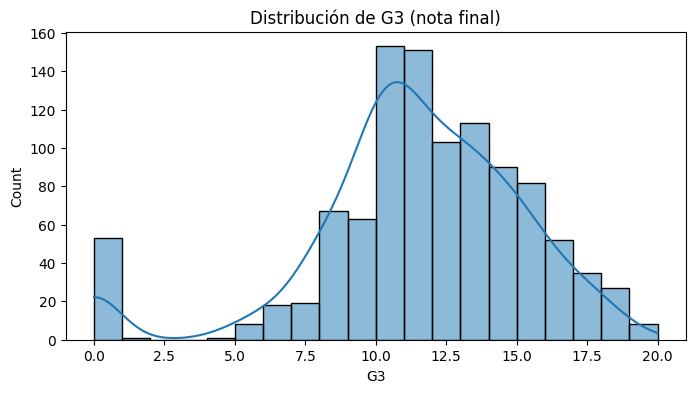

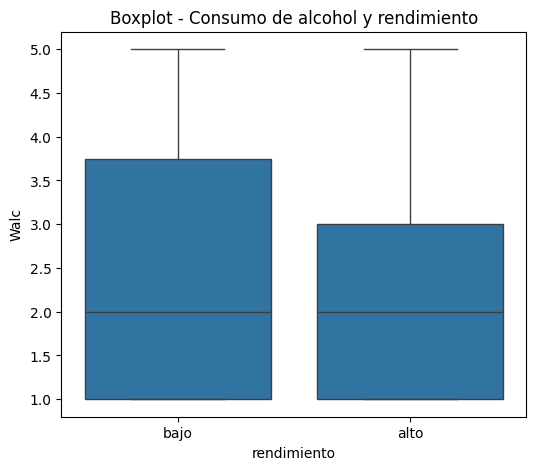

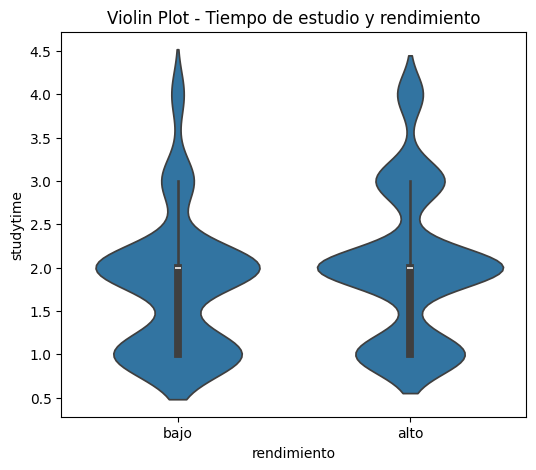

Variables seleccionadas:
Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'Dalc',
       'absences', 'G1', 'G2', 'school_MS', 'reason_reputation',
       'guardian_other', 'higher_yes', 'romantic_yes'],
      dtype='object')

=== Regresión Logística ===
Accuracy:  0.89
Precision: 0.87
Recall:    0.66
F1 Score:  0.75


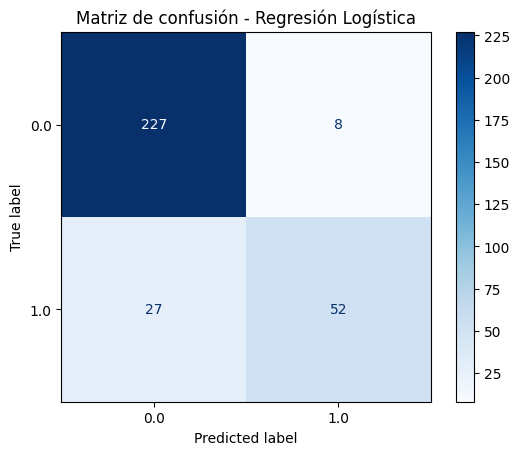


=== Random Forest ===
Accuracy:  0.89
Precision: 0.91
Recall:    0.63
F1 Score:  0.75


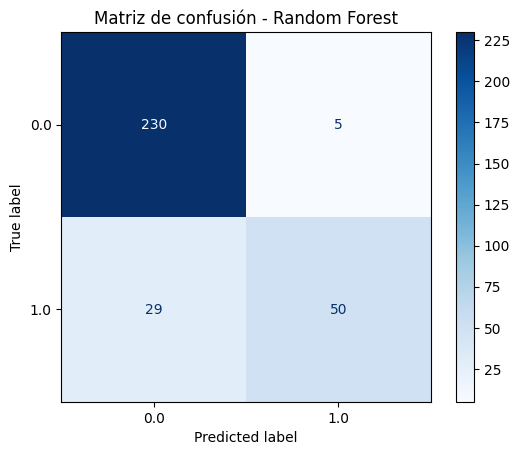

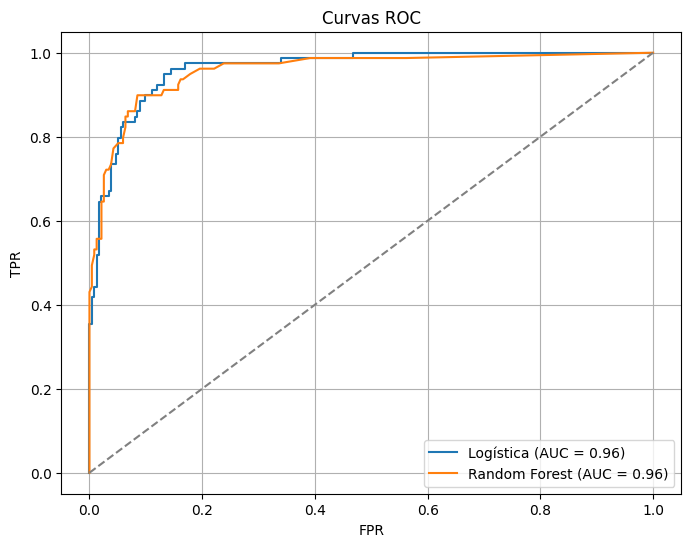

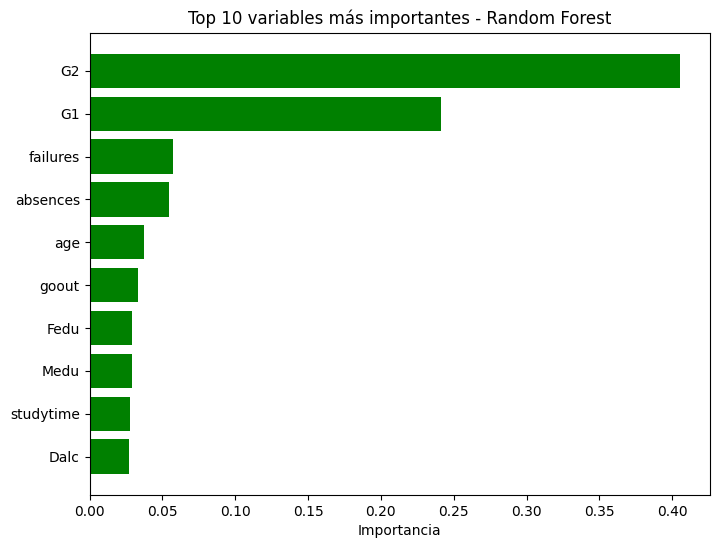

In [ ]:
# 📌 SUBIDA DE ARCHIVO MANUAL
from google.colab import files
uploaded = files.upload()

# 📄 LECTURA DEL CSV
import io
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ==========================
# 1. ANÁLISIS EXPLORATORIO
# ==========================

print("Primeras filas:")
display(df.head())

print("Información del dataset:")
print(df.info())

print("Valores nulos por columna:")
print(df.isnull().sum())

# 🔄 Binarización de la variable objetivo
df['rendimiento'] = df['G3'].apply(lambda x: 'alto' if x >= 10 else 'bajo')

# 📊 Gráficos iniciales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title("Distribución de G3 (nota final)")
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x='rendimiento', y='Walc', data=df)
plt.title('Boxplot - Consumo de alcohol y rendimiento')
plt.show()

# Violin plot
plt.figure(figsize=(6,5))
sns.violinplot(x='rendimiento', y='studytime', data=df)
plt.title('Violin Plot - Tiempo de estudio y rendimiento')
plt.show()

# ===============================
# 2. PREPARACIÓN DE LOS DATOS
# ===============================

# 👉 Codificamos variables categóricas con dummies
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('rendimiento')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 👉 Codificamos la variable target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['rendimiento'] = le.fit_transform(df['rendimiento'])  # 1=alto, 0=bajo

# 👉 Imputación de valores nulos
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_encoded[df_encoded.columns] = imputer.fit_transform(df_encoded)

# 👉 Separación en features y target
X = df_encoded.drop(['G3', 'rendimiento'], axis=1)
y = df_encoded['rendimiento']

# ===============================
# 3. SELECCIÓN DE VARIABLES
# ===============================

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

selected_cols = X.columns[selector.get_support()]

print("Variables seleccionadas:")
print(selected_cols)

# ===============================
# 4. DIVISIÓN Y ESCALADO
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 5. ENTRENAMIENTO DE MODELOS
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ===============================
# 6. EVALUACIÓN DE MODELOS
# ===============================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

# 📌 Función auxiliar para métricas
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n=== {nombre} ===")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.2f}")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

# Evaluación
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# ===============================
# 7. CURVAS ROC
# ===============================

y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logística (AUC = {auc(fpr_log, tpr_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC")
plt.legend()
plt.grid()
plt.show()

# ===============================
# 8. IMPORTANCIA DE VARIABLES
# ===============================

import numpy as np

importancias = rf_model.feature_importances_
indices = np.argsort(importancias)[-10:]

plt.figure(figsize=(8,6))
plt.title("Top 10 variables más importantes - Random Forest")
plt.barh(range(len(indices)), importancias[indices], color="green")
plt.yticks(range(len(indices)), [X[selected_cols].columns[i] for i in indices])
plt.xlabel("Importancia")
plt.show()
